In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from tensorflow.keras.applications import EfficientNetB0
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2023-05-03 21:51:53.663038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-03 21:51:53.671191: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-03 21:51:53.671388: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
datagen = ImageDataGenerator()

In [4]:
train_it = datagen.flow_from_directory('/home/pl/Documents/course_work_2/chest_xray/train/', class_mode='binary', batch_size=8)
test_it = datagen.flow_from_directory('/home/pl/Documents/course_work_2/chest_xray/test/', class_mode='binary', batch_size=8)
val_it = datagen.flow_from_directory('/home/pl/Documents/course_work_2/chest_xray/val/', class_mode='binary', batch_size=8)
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 5467 images belonging to 2 classes.
Found 691 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Batch shape=(8, 256, 256, 3), min=0.000, max=255.000


In [5]:
efficient_net = EfficientNetB0(
    weights='imagenet',
    input_shape=(256,256,3),
    include_top=False,
    pooling='max'
)
# efficient_net.trainable = False

model = Sequential()
model.add(efficient_net)
model.add(Dense(units = 120, activation='relu'))
model.add(Dense(units = 120, activation = 'relu'))
model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

2023-05-03 21:52:12.954520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 21:52:12.954798: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-03 21:52:12.955012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-03 21:52:12.955161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense (Dense)               (None, 120)               153720    
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 1)                 121       
                                                                 
Total params: 4,217,932
Trainable params: 4,175,909
Non-trainable params: 42,023
_________________________________________________________________


In [6]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

/home/pl/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
history = model.fit(
    train_it,
    epochs = 50,
    validation_data = val_it
)

Epoch 1/50


2023-05-03 21:52:35.516270: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101


684/684 [==============================] - 179s 246ms/step - loss: 0.1579 - accuracy: 0.9384 - val_loss: 0.3147 - val_accuracy: 0.8125
Epoch 2/50
684/684 [==============================] - 166s 243ms/step - loss: 0.0609 - accuracy: 0.9793 - val_loss: 0.2652 - val_accuracy: 0.8750
Epoch 3/50
684/684 [==============================] - 166s 243ms/step - loss: 0.0294 - accuracy: 0.9901 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4/50
684/684 [==============================] - 166s 243ms/step - loss: 0.0305 - accuracy: 0.9892 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 5/50
684/684 [==============================] - 166s 243ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/50
684/684 [==============================] - 166s 243ms/step - loss: 0.0215 - accuracy: 0.9925 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/50
684/684 [==============================] - 166s 243ms/step - loss: 0.0137 - accuracy: 0.9945 - val_loss: 0.0026 - val_accura

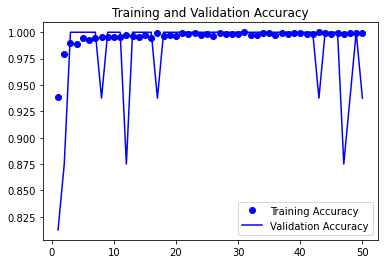

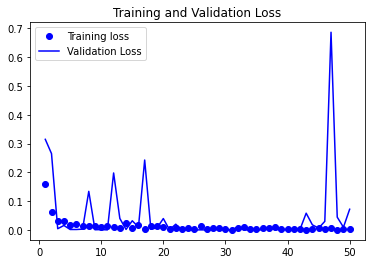

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [10]:
preds = model.predict_generator(
    test_it,
    steps=len(test_it.filenames)
)

/tmp/ipykernel_82111/3817931190.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(


In [11]:
image_ids = [name.split('/')[-1] for name in test_it.filenames]
predictions = preds.flatten()
data = {'id': image_ids, 'has_pneumonia':predictions} 
submission = pd.DataFrame(data)
print(submission.head())

          id  has_pneumonia
0  0101.jpeg       0.001698
1  0102.jpeg       1.000000
2  0103.jpeg       1.000000
3  0105.jpeg       0.541123
4  0106.jpeg       0.070846


In [12]:
model.save('/home/pl/Documents/course_work_2/model_full_train/')

INFO:tensorflow:Assets written to: /home/pl/Documents/course_work_2/model_full_train/assets


INFO:tensorflow:Assets written to: /home/pl/Documents/course_work_2/model_full_train/assets
